In [718]:
import pandas as pd

# df=pd.read_csv("df_final_2.csv")
X_train = pd.read_csv('child-mind-institute-problematic-internet-use/train.csv').iloc[:, :-1]
y_train = pd.read_csv('child-mind-institute-problematic-internet-use/train.csv').iloc[:, -1]
X_test = pd.read_csv('child-mind-institute-problematic-internet-use/test.csv').iloc[:, :-1]
y_test = pd.read_csv('child-mind-institute-problematic-internet-use/test.csv').iloc[:, -1]

# X_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv').iloc[:, :-1]
# y_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv').iloc[:, -1]
# X_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv').iloc[:, :-1]
# y_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv').iloc[:, -1]

In [719]:
train_series_data_stats = pd.read_csv('train_series_data_stats.csv')
test_series_data_stats = pd.read_csv('test_series_data_stats.csv')

# train_series_data_stats = pd.read_csv('/kaggle/input/series-data-v2/train_series_data_stats.csv')
# test_series_data_stats = pd.read_csv('/kaggle/input/series-data-v2/test_series_data_stats.csv')

In [720]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def get_aggregations(df, column_groupby, column_agg):

    if not isinstance(column_agg, list):
        column_agg = [column_agg]
    
    # Create the aggregation dictionary
    aggregation_dict = {}
    for col in column_agg:
        aggregation_dict.update({
            f'Median_{col}': (col, 'median'),
            f'Max_{col}': (col, 'max'),
            f'Min_{col}': (col, 'min'),
            f'Sum_{col}': (col, 'sum'),
            f'Std_{col}': (col, 'std'),
            f'Mean_{col}': (col, 'mean')
        })
    
    # Perform groupby and aggregation
    df_agg = df.groupby(column_groupby).agg(**aggregation_dict).reset_index()

    return df_agg

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

def round_final_results(y_pred):
    conditions = [y_test <= 0.5, y_test <= 1.5, y_test <= 2.5, y_test > 2.5]
    choices = [0, 1, 2, 3]
    y_pred_round = np.select(conditions, choices, default=1)
    return y_pred_round

def evaluate_linear_models(X, y, models=None, test_size=0.3, random_state=42):
    # Default models if none are specified
    if models is None:
        models = {
            'LinearRegression': LinearRegression(),
            'Ridge': Ridge(),
            'Lasso': Lasso(),
            'ElasticNet': ElasticNet()
        }

    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize dictionary to store QWK scores for each model
    results = {}

    # Iterate over each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Round predictions to nearest integers if the target variable is categorical
        y_train_pred_rounded = np.round(y_train_pred).astype(int)
        y_val_pred_rounded = np.round(y_val_pred).astype(int)
        
        # Calculate QWK scores
        qwk_score_train = cohen_kappa_score(y_train, y_train_pred_rounded, weights='quadratic')
        qwk_score_val = cohen_kappa_score(y_val, y_val_pred_rounded, weights='quadratic')
        
        # Store results
        results[model_name] = {
            "Train QWK Score": qwk_score_train,
            "Validation QWK Score": qwk_score_val
        }

        # Print results for each model
        print(f"Model: {model_name}")
        print(f"Train QWK Score: {qwk_score_train}")
        print(f"Validation QWK Score: {qwk_score_val}\n")

    return results

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_tree_models(X, y, models=None, test_size=0.3, random_state=42):
    # Default models if none are specified
    if models is None:
        models = {
            'DecisionTree': DecisionTreeRegressor(random_state=random_state),
            'RandomForest': RandomForestRegressor(random_state=random_state),
            'GradientBoosting': GradientBoostingRegressor(random_state=random_state),
            'XGBoost': XGBRegressor(random_state=random_state)
        }

    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize dictionary to store QWK scores for each model
    results = {}

    # Iterate over each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Round predictions to nearest integers since the target is categorical
        y_train_pred_rounded = np.round(y_train_pred).astype(int)
        y_val_pred_rounded = np.round(y_val_pred).astype(int)
        
        # Calculate QWK scores
        qwk_score_train = cohen_kappa_score(y_train, y_train_pred_rounded, weights='quadratic')
        qwk_score_val = cohen_kappa_score(y_val, y_val_pred_rounded, weights='quadratic')
        
        # Store results
        results[model_name] = {
            "Train QWK Score": qwk_score_train,
            "Validation QWK Score": qwk_score_val
        }

        # Print results for each model
        print(f"Model: {model_name}")
        print(f"Train QWK Score: {qwk_score_train}")
        print(f"Validation QWK Score: {qwk_score_val}\n")

    return results

# Usage example
# X and y should be your features and target variable DataFrames/Series
# results = evaluate_tree_models(X_train, y_train)



In [721]:
merged_data = X_train.merge(train_series_data_stats, how='left', on='id')

In [722]:
merged_data_df = merged_data.select_dtypes(include='number')
correlation_matrix = merged_data_df.corr()

In [723]:
# correlation_matrix.to_excel('corr_matrix.xlsx')

In [724]:
stat_columns = [col for col in merged_data_df.columns if col.startswith("stat")]

In [725]:
X_train = merged_data

In [726]:
other_columns = []
column_groupby = 'PCIAT-PCIAT_Total'
column_agg=['FGC-FGC_CU','Physical-Systolic_BP','Physical-BMI','BIA-BIA_BMC','BIA-BIA_BMI','Basic_Demos-Age','Basic_Demos-Sex','stat_72']
# column_agg=['FGC-FGC_CU','Physical-Systolic_BP','Physical-Diastolic_BP','Physical-BMI'] # 0.152

df_agg = get_aggregations(X_train, column_groupby=column_groupby, column_agg=column_agg)

for column in df_agg.columns:
    df_agg[column] = df_agg[column].fillna(df_agg[column].mean())

In [727]:
# from sklearn.preprocessing import PolynomialFeatures

# # Verificar pra calcular separadamente ou tudo junto polinomios e relacoes se adicionar mais de uma coluna
# poly_df = get_polynomial_features(df_agg, columns=column_agg, degree=2)

# df_agg = pd.concat([df_agg, poly_df], axis=1)

In [728]:
print(f'Features with highest correlation to {column_groupby} \n')
columns_corr=[]
for column in column_agg:

    corr_df = df_agg.loc[:, df_agg.columns[df_agg.columns.str.endswith(column)].tolist()]
    corr_df[column_groupby] = df_agg[column_groupby]
    correlation_matrix = corr_df.corr()
    feature_highest_corr = correlation_matrix[column_groupby].drop(column_groupby).abs().idxmax()
    feature_corr_value = correlation_matrix[column_groupby].drop(column_groupby).abs().max()
    print(f'{feature_highest_corr}: {feature_corr_value} \n')

    columns_corr.append(feature_highest_corr)

print(columns_corr)

Features with highest correlation to PCIAT-PCIAT_Total 

Median_FGC-FGC_CU: 0.6644843180692392 

Min_Physical-Systolic_BP: 0.6429503351979634 

Median_Physical-BMI: 0.65414920713236 

Median_BIA-BIA_BMC: 0.673042684902567 

Min_BIA-BIA_BMI: 0.6592806566970287 

Mean_Basic_Demos-Age: 0.910153146014278 

Sum_Basic_Demos-Sex: 0.6056946649630189 

Max_stat_72: 0.6468901380953064 

['Median_FGC-FGC_CU', 'Min_Physical-Systolic_BP', 'Median_Physical-BMI', 'Median_BIA-BIA_BMC', 'Min_BIA-BIA_BMI', 'Mean_Basic_Demos-Age', 'Sum_Basic_Demos-Sex', 'Max_stat_72']


In [729]:
columns_corr = [item for item in columns_corr if item is not None and not (isinstance(item, float) and np.isnan(item))]

In [730]:
# all_columns = other_columns + [column_groupby] + columns_corr
all_columns = [column_groupby] + columns_corr + other_columns

In [731]:
columns_df_agg = [column_groupby] + columns_corr 
df_agg = df_agg.loc[:, columns_df_agg]

In [732]:
df_agg.describe()

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Mean_Basic_Demos-Age,Sum_Basic_Demos-Sex,Max_stat_72
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.075269,12.445055,94.763441,19.788974,4.494338,15.568655,11.476051,10.720430,0.607610
std,27.112983,6.410102,16.542040,4.013770,1.103305,4.593786,1.988782,13.655995,0.208489
min,0.000000,3.000000,49.000000,15.515430,2.794585,0.048267,7.678571,0.000000,0.036416
25%,23.000000,8.000000,87.000000,17.570840,3.651295,13.487900,10.034483,3.000000,0.502127
50%,46.000000,11.000000,93.000000,18.618419,4.342710,14.225500,11.384615,9.000000,0.674976
75%,69.000000,14.000000,101.000000,19.933707,4.914095,16.238800,12.769231,16.000000,0.758899
max,93.000000,35.000000,166.000000,39.339185,8.182705,39.343500,17.000000,116.000000,0.942128


In [733]:
# columns = [column_groupby]
# columns = columns + columns_corr + other_columns
# print(columns)
new_X_train = X_train.merge(df_agg, how='left', on=column_groupby)[all_columns]

In [734]:
for column in df_agg.columns:
    new_X_train[column] = new_X_train[column].fillna(df_agg[column].mean())

In [735]:
for column in other_columns:
    new_X_train[column] = new_X_train[column].fillna(new_X_train[column].mean())

In [736]:
new_X_train.isna().sum()
len(new_X_train)

3960

In [737]:
new_df_train = new_X_train.select_dtypes(include='number')
correlation_matrix = new_df_train.corr()

In [738]:
correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Mean_Basic_Demos-Age,Sum_Basic_Demos-Sex,Max_stat_72
PCIAT-PCIAT_Total,1.000000,0.798315,0.602366,0.755443,0.760010,0.589979,0.923471,-0.629401,-0.702085
Median_FGC-FGC_CU,0.798315,1.000000,NaN,0.675867,0.747832,NaN,0.820947,-0.517403,-0.542337
Min_Physical-Systolic_BP,0.602366,NaN,1.000000,0.516170,NaN,NaN,0.621598,-0.681920,-0.546318
Median_Physical-BMI,0.755443,0.675867,0.516170,1.000000,0.670244,0.619822,0.808789,NaN,-0.507045
Median_BIA-BIA_BMC,0.760010,0.747832,NaN,0.670244,1.000000,NaN,0.807725,-0.530578,NaN
Min_BIA-BIA_BMI,0.589979,NaN,NaN,0.619822,NaN,1.000000,0.511595,NaN,-0.526176
Mean_Basic_Demos-Age,0.923471,0.820947,0.621598,0.808789,0.807725,0.511595,1.000000,-0.658748,-0.618886
Sum_Basic_Demos-Sex,-0.629401,-0.517403,-0.681920,NaN,-0.530578,NaN,-0.658748,1.000000,0.550654
Max_stat_72,-0.702085,-0.542337,-0.546318,-0.507045,NaN,-0.526176,-0.618886,0.550654,1.000000


In [739]:
# correlation_matrix.to_excel('corr_matrix_05.xlsx')

In [740]:
from sklearn.model_selection import train_test_split

df = pd.concat([new_X_train, y_train], axis=1)
df = df[df['sii'].notna()]
X = df.iloc[:, :-1]
y = df['sii']
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)


In [741]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_split, y_train_split)
test_score = reg.score(X_test_split, y_test_split)
print(f'Test Score: {test_score}')

Test Score: 0.854252090417383


In [742]:
null_indexes = y_train[y_train.isna()].index

In [743]:
X_null = new_X_train.iloc[null_indexes] 

In [744]:
y_pred = reg.predict(X_null) 

(array([   0.,    0.,    0.,    0.,    0., 1224.,    0.,    0.,    0.,
           0.]),
 array([0.75704993, 0.85704993, 0.95704993, 1.05704993, 1.15704993,
        1.25704993, 1.35704993, 1.45704993, 1.55704993, 1.65704993,
        1.75704993]),
 <BarContainer object of 10 artists>)

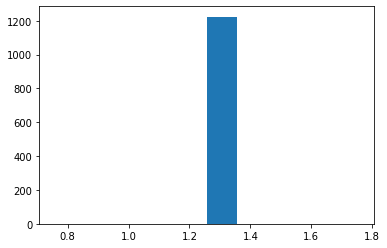

In [745]:
import matplotlib.pyplot as plt
plt.hist(y_pred)

In [746]:
y_train.iloc[null_indexes] = y_pred

In [747]:
y_train = np.round(y_train)

In [748]:
X_train = new_X_train.drop(columns=column_groupby)

In [749]:
evaluate_linear_models(X_train, y_train)

Model: LinearRegression
Train QWK Score: 0.8200150861990431
Validation QWK Score: 0.8266425544999244

Model: Ridge
Train QWK Score: 0.8200191513278716
Validation QWK Score: 0.8266425544999244

Model: Lasso
Train QWK Score: 0.25586954491065905
Validation QWK Score: 0.26489506758359027

Model: ElasticNet
Train QWK Score: 0.5089156229400131
Validation QWK Score: 0.526391124286705



{'LinearRegression': {'Train QWK Score': np.float64(0.8200150861990431),
  'Validation QWK Score': np.float64(0.8266425544999244)},
 'Ridge': {'Train QWK Score': np.float64(0.8200191513278716),
  'Validation QWK Score': np.float64(0.8266425544999244)},
 'Lasso': {'Train QWK Score': np.float64(0.25586954491065905),
  'Validation QWK Score': np.float64(0.26489506758359027)},
 'ElasticNet': {'Train QWK Score': np.float64(0.5089156229400131),
  'Validation QWK Score': np.float64(0.526391124286705)}}

In [750]:
local_X_train, local_X_test, local_y_train, local_y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [751]:
from sklearn.preprocessing import StandardScaler

# Assume 'feature_to_scale' is the name of the feature you want to scale
feature_to_scale = 'Max_stat_72'

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform only the selected feature
local_X_train[[feature_to_scale]] = scaler.fit_transform(local_X_train[[feature_to_scale]])
local_X_test[[feature_to_scale]] = scaler.transform(local_X_test[[feature_to_scale]])

In [752]:
# from sklearn.preprocessing import MinMaxScaler

# feature_to_scale = 'Mean_Basic_Demos-Age'

# # Initialize MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Fit and transform on the training set, and transform on the test set
# local_X_train[[feature_to_scale]] = scaler.fit_transform(local_X_train[[feature_to_scale]])
# local_X_test[[feature_to_scale]] = scaler.transform(local_X_test[[feature_to_scale]])

In [753]:
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# # Initialize the model
# model = LGBMRegressor()

# # Parameter grid for tuning
# param_grid = {
#     'num_leaves': [20, 31, 40, 50],
#     'max_depth': [-1, 5, 10, 15],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'n_estimators': [100, 200, 500],
#     'min_child_samples': [10, 20, 30],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

In [754]:
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,
#     n_iter=50,  # Number of parameter combinations to try
#     scoring='neg_mean_squared_error',  # Customize based on your task
#     cv=5,  # Number of folds for cross-validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit the randomized search
# random_search.fit(local_X_train, local_y_train)

# # Best parameters and score
# print("Best parameters found: ", random_search.best_params_)
# print("Best score found: ", random_search.best_score_)

In [755]:
# from sklearn.metrics import mean_squared_error, r2_score

# # Train the final model with the best parameters
# best_params = random_search.best_params_  # or grid_search.best_params_
# final_model = LGBMRegressor(**best_params)
# final_model.fit(local_X_train, local_y_train)

# # Predict and evaluate on the test set
# local_y_pred = final_model.predict(local_X_test)
# mse = mean_squared_error(local_y_test, local_y_pred)
# r2 = r2_score(local_y_test, local_y_pred)
# print("Mean Squared Error on Test Set:", mse)
# print("R² Score on Test Set:", r2)

In [756]:
final_model = LinearRegression()
final_model.fit(local_X_train, local_y_train)

LinearRegression()

In [757]:
final_model.score(local_X_test, local_y_test)

0.7316647600301653

In [758]:
local_y_pred = final_model.predict(local_X_test)
local_y_train_pred = final_model.predict(local_X_train)

# conditions = [local_y_pred <= 0, local_y_pred <= 1, local_y_pred <= 2, local_y_pred <= 3]
# choices = [0, 1, 2, 3]
# local_y_pred = np.select(conditions, choices, default=1)

local_y_pred = np.round(local_y_pred).astype(int)
local_y_train_pred = np.round(local_y_train_pred).astype(int)

In [759]:
from sklearn.metrics import cohen_kappa_score

qwk_score_train = cohen_kappa_score(local_y_train, local_y_train_pred, weights='quadratic')
qwk_score_val = cohen_kappa_score(local_y_test, local_y_pred, weights='quadratic')
print("Train QWK Score:", qwk_score_train)
print("Validation QWK Score:", qwk_score_val)


Train QWK Score: 0.8180831488637769
Validation QWK Score: 0.8380349350032991


In [760]:
results = pd.concat([local_y_test.reset_index(), pd.DataFrame(local_y_pred)], axis=1)
results.to_excel('results_local_test_data.xlsx')

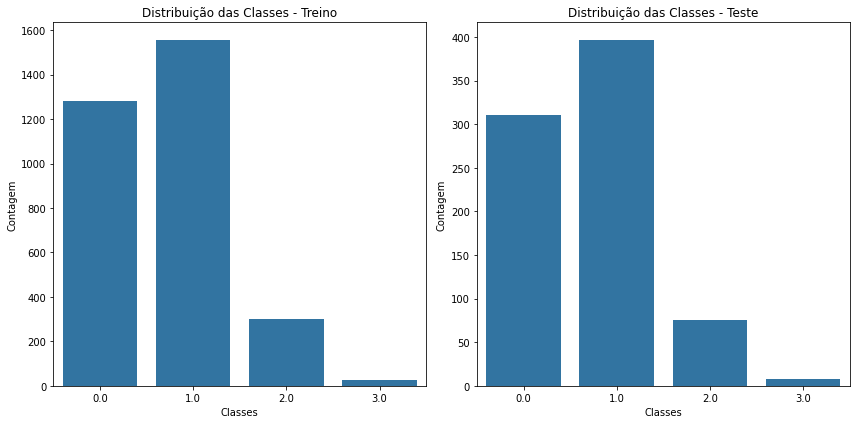

In [761]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que você tenha um DataFrame `train` e `test`, e a coluna `target` contém a variável alvo
plt.figure(figsize=(12, 6))

# Treino
plt.subplot(1, 2, 1)
sns.countplot(x='sii', data=pd.DataFrame(local_y_train))
plt.title('Distribuição das Classes - Treino')
plt.xlabel('Classes')
plt.ylabel('Contagem')

# Teste
plt.subplot(1, 2, 2)
sns.countplot(x='sii', data=pd.DataFrame(local_y_test))
plt.title('Distribuição das Classes - Teste')
plt.xlabel('Classes')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [762]:
# for column in columns_corr:
#     plt.figure(figsize=(12, 6))

#     # Treino
#     sns.kdeplot(local_X_train[column], label='Treino', color='blue')
#     sns.kdeplot(local_X_test[column], label='Teste', color='red')
#     plt.title(f'Distribuição {column} - Treino vs Teste')
#     plt.xlabel('Valores da Feature')
#     plt.ylabel('Densidade')
#     plt.legend()
#     plt.show()

In [763]:
all_columns

['PCIAT-PCIAT_Total',
 'Median_FGC-FGC_CU',
 'Min_Physical-Systolic_BP',
 'Median_Physical-BMI',
 'Median_BIA-BIA_BMC',
 'Min_BIA-BIA_BMI',
 'Mean_Basic_Demos-Age',
 'Sum_Basic_Demos-Sex',
 'Max_stat_72']

In [764]:
column_agg
# print(columns_agg_after)

['FGC-FGC_CU',
 'Physical-Systolic_BP',
 'Physical-BMI',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'Basic_Demos-Age',
 'Basic_Demos-Sex',
 'stat_72']

In [765]:
merged_data_X_test = X_test.merge(test_series_data_stats, how='left', on='id')

In [766]:
for column in other_columns:
    merged_data_X_test[column] = merged_data_X_test[column].fillna(new_X_train[column].mean())

In [767]:
X_test_predict = merged_data_X_test.loc[:, column_agg + other_columns]

In [768]:
for column in column_agg:
    index = column_agg.index(column)
    if X_test_predict[column].isna().sum() > 0:
        try:
            X_test_predict[columns_corr[index]] = X_test_predict[column].fillna(df_agg[columns_corr[index]].mean())
        except:
            print(index)
    else:
        X_test_predict[columns_corr[index]] = X_test_predict[column]

In [769]:
X_test_predict = X_test_predict.loc[:, columns_corr + other_columns]

In [770]:
y_test = final_model.predict(X_test_predict)

In [771]:
y_test

array([-1.45552492,  0.01475454,  0.5401138 ,  0.34588645,  3.26362596,
        1.97177279,  0.85257902,  0.37096741,  2.19046638,  3.61949758,
        0.77252459,  0.76697989,  2.01966315,  1.03715439,  1.12285151,
       -0.47704146, -1.48534778,  0.33736044, -0.71097798,  0.41110826])

In [772]:
y_test_round = np.round(y_test).astype(int)

In [773]:
y_test_round = round_final_results(y_test_round)

In [774]:
print(y_test_round)

[0 0 1 0 3 2 1 0 2 3 1 1 2 1 1 0 0 0 0 0]


In [775]:
df_y_test = pd.DataFrame({'id': X_test['id'], 'sii': y_test_round})

In [776]:
from datetime import datetime
df_y_test.to_csv(f'submission.csv', index=False)

In [777]:
df_y_test

,id,sii
0,00008ff9,0
1,000fd460,0
2,00105258,1
3,00115b9f,0
4,0016bb22,3
5,001f3379,2
6,0038ba98,1
7,0068a485,0
8,0069fbed,2
9,0083e397,3


In [778]:
# pd.concat([X_train,y_train], axis=1).to_csv('df_final_to_powerbi_2.csv')